# Sentimental Analysis of YouTube Videos

#### Sentiment Analysis is one of the Natural Language Processing techniques, which can be used to determine the sensibility behind the texts, i.e. tweets, movie reviews, youtube comments, any incoming message, etc. 

Here we will perform sentiment analysis on youtube video’s comments. To carry out the sentiment analysis on any youtube video, 
the first thing we need is the comments on that video which can be extracted here below.
With the help of this sentiment analysis of comments, the user can get to know about the community acceptance of its channel/video based on that one can maintain their content quality.
Another use case of the same is analyzing the trending video as many times, there are videos with more views and likes on trending
 but if you will use sentiment analysis you will easily be able to find the most useful video of a particular channel, celebrity, category, etc.

### 1. Import necessary package and library

In [78]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [79]:
pip install -U textblob

Requirement already up-to-date: textblob in c:\programdata\anaconda3\lib\site-packages (0.17.1)
Note: you may need to restart the kernel to use updated packages.


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
pd.get_option("display.max_columns",None)
pd.get_option("display.max_rows",None)

60

### 2. Reading files

In [81]:
videos = pd.read_csv('USvideos.csv',encoding='utf8',error_bad_lines = False)
comm = pd.read_csv('UScomments.csv',encoding='utf8',error_bad_lines = False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\n'
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'


### 3. Inspecting the dataframe

In [82]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [83]:
comm.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


##### 3.1 Making the BOB classifier and using it to test the sentiments of the sentence


In [84]:
pol =[]
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    
    except:
        pol.append(0)

In [85]:
print(pol==0)

False


##### 3.2 Converting the continuous variable to categorical one

In [86]:
comm['pol']=pol
comm['pol'][comm.pol==0]= 0
comm['pol'][comm.pol>0]= 1
comm['pol'][comm.pol<0]= -1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

---------Reading positive comments

In [87]:
positive = comm[comm.pol==1]
positive.head()

,video_id,comment_text,likes,replies,pol
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,1.0
11,XpVt6Z1Gjjo,"Dear Logan, I really wanna get your Merch but ...",0,0,1.0
13,XpVt6Z1Gjjo,Casey is still better then logan,0,0,1.0
15,XpVt6Z1Gjjo,He happy cause he in a movie,0,0,1.0
18,XpVt6Z1Gjjo,It's been fun watching you grow. I'm at 42 day...,3,0,1.0


(-0.5, 999.5, 499.5, -0.5)

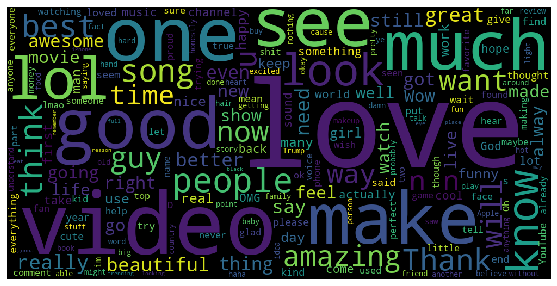

In [88]:
k  = (' '.join(positive['comment_text']))
wordcloud = WordCloud(width = 1000,height=500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

----------Reading negative comments

(-0.5, 999.5, 499.5, -0.5)

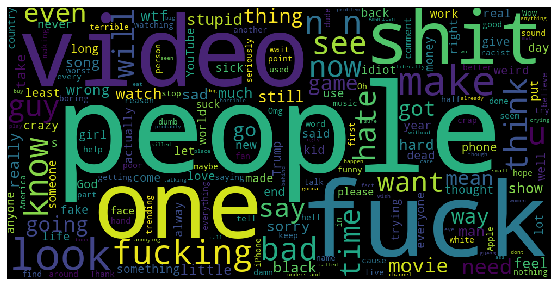

In [89]:
negative = comm[comm.pol==-1]
k=(' '.join(negative['comment_text']))
wordcloud = WordCloud(width=1000,height=500).generate(k)
plt.figure(figsize=(15,5,))
plt.imshow(wordcloud)
plt.axis('off')

##### 3.3 Lets check number of types of comments

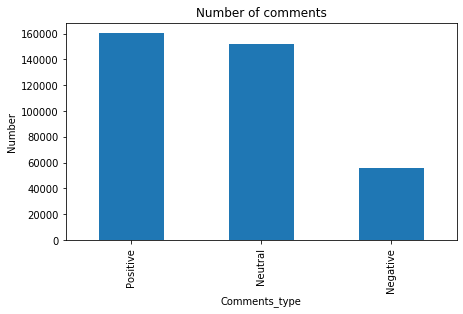

In [90]:
comm['pol'].replace({1:'Positive',0:'Neutral',-1:'Negative'}).value_counts().plot(kind='bar',figsize=(7,4));
plt.title('Number of comments');
plt.xlabel('Comments_type');
plt.ylabel('Number');

##### 3.4 Generating dataframe with unique id and their comments

In [91]:
id = []
pos_comm = []
neg_comm = []
neutral_comm = []
for i in set(comm.video_id):
    id.append(i)
    try:
        pos_comm.append(comm[comm.video_id==i].pol.value_counts()[1])
    except:
        pos_comm.append(0)
    try:
        neg_comm.append(comm[comm.video_id==i].pol.value_counts()[-1])
    except:
        neg_comm.append(0)
    try:
        neutral_comm.append(comm[comm.video_id==i].pol.value_counts()[0])
    except:
        neutral_comm.append(0)

In [92]:
df_unique = pd.DataFrame(id)
df_unique.columns=['id']
df_unique['pos_comm'] = pos_comm
df_unique['neg_comm'] = neg_comm
df_unique['neutral_comm'] = neutral_comm
df_unique['total_comments'] = df_unique['pos_comm'] + df_unique['neg_comm']+df_unique['neutral_comm']
df_unique.head()

,id,pos_comm,neg_comm,neutral_comm,total_comments
0,XSLc0d5aM04,213,212,275,700
1,0qfgZJNCCJQ,172,23,205,400
2,HsiWOp-ImoE,251,52,197,500
3,bgc2rSzKA3w,22,31,42,95
4,apskNjHtGh8,7,4,21,32


---------------Saving for further analysis

In [93]:
df_unique.to_csv('unique.csv',index=False)

### 4. Exploratory Data Analysis

In [94]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [95]:
comm.head()

,video_id,comment_text,likes,replies,pol
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


-------Date is of range 13.09 to 3.10(3 weeks)

In [96]:
videos.date.value_counts().sort_index()

1.10     200
2.10     200
3.10     200
13.09    200
14.09    200
15.09    200
16.09    200
17.09    200
18.09    200
19.09    200
20.09    200
21.09    200
22.09    200
23.09    200
24.09    199
25.09    199
26.09    199
27.09    199
28.09    200
29.09    200
30.09    200
Name: date, dtype: int64

-------Trending videos for a week

In [97]:
print(videos.video_id.value_counts()[:13])
more_trending = videos.video_id.value_counts()[:13].index

cLdxuaxaQwc    7
8ndhidEmUbI    7
74zJ4scJzNs    7
5Xe0Qd6bUFo    7
1QWLyi03twg    7
4X6a3G_0HjY    7
sjlHnJvXdQs    7
dInwVhRtN4E    7
XpVt6Z1Gjjo    7
CYoRmfI0LUc    7
mlxdnyfkWKQ    7
SHq2qrFUlGY    7
WYYvHb03Eog    7
Name: video_id, dtype: int64


In [98]:
videos[videos.video_id=='dInwVhRtN4E']

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
1402,dInwVhRtN4E,Everything Wrong With The LEGO Batman Movie,CinemaSins,1,LEGO|LEGO Batman|Batman movie|cinemasins|cinem...,1311031,43066,1618,8155,https://i.ytimg.com/vi/dInwVhRtN4E/default.jpg,20.09
1615,dInwVhRtN4E,Everything Wrong With The LEGO Batman Movie,CinemaSins,1,LEGO|LEGO Batman|Batman movie|cinemasins|cinem...,2030432,53758,2401,10117,https://i.ytimg.com/vi/dInwVhRtN4E/default.jpg,21.09
1823,dInwVhRtN4E,Everything Wrong With The LEGO Batman Movie,CinemaSins,1,LEGO|LEGO Batman|Batman movie|cinemasins|cinem...,2225184,56123,2585,10641,https://i.ytimg.com/vi/dInwVhRtN4E/default.jpg,22.09
2126,dInwVhRtN4E,Everything Wrong With The LEGO Batman Movie,CinemaSins,1,LEGO|LEGO Batman|Batman movie|cinemasins|cinem...,2391377,58423,2745,8693,https://i.ytimg.com/vi/dInwVhRtN4E/default.jpg,23.09
2352,dInwVhRtN4E,Everything Wrong With The LEGO Batman Movie,CinemaSins,1,LEGO|LEGO Batman|Batman movie|cinemasins|cinem...,2490053,59551,2801,8937,https://i.ytimg.com/vi/dInwVhRtN4E/default.jpg,24.09
2588,dInwVhRtN4E,Everything Wrong With The LEGO Batman Movie,CinemaSins,1,LEGO|LEGO Batman|Batman movie|cinemasins|cinem...,2582647,60633,2861,9222,https://i.ytimg.com/vi/dInwVhRtN4E/default.jpg,25.09
2796,dInwVhRtN4E,Everything Wrong With The LEGO Batman Movie,CinemaSins,1,LEGO|LEGO Batman|Batman movie|cinemasins|cinem...,2629650,61164,2890,9409,https://i.ytimg.com/vi/dInwVhRtN4E/default.jpg,26.09


If we see this particular id started trending from 20.09 to 26.09, for a week it was in most trending list

In [99]:
for i in more_trending:
    info = videos[videos.video_id==i][['video_id','title','channel_title','views','likes','dislikes',
                                       'comment_total','date']]
    print(info)
    print("***********************")

         video_id        title channel_title    views   likes  dislikes  \
2     cLdxuaxaQwc  My Response     PewDiePie  5845909  576597     39774   
210   cLdxuaxaQwc  My Response     PewDiePie  6997601  626155     46445   
437   cLdxuaxaQwc  My Response     PewDiePie  7706359  659184     50584   
700   cLdxuaxaQwc  My Response     PewDiePie  8002631  672775     52253   
930   cLdxuaxaQwc  My Response     PewDiePie  8347038  687381     54352   
1152  cLdxuaxaQwc  My Response     PewDiePie  8665083  700870     56487   
1393  cLdxuaxaQwc  My Response     PewDiePie  8808424  706104     57280   

      comment_total   date  
2            170708  13.09  
210          190979  14.09  
437          199406  15.09  
700          128771  16.09  
930          130106  17.09  
1152         134318  18.09  
1393         135649  19.09  
***********************
         video_id                              title          channel_title  \
1406  8ndhidEmUbI  TOMB RAIDER - Official Trailer #1  Warner Bro

If we compare the views for each video it gradually increases for a week as it is expected . It is clear why they are more trending for a week by looking number of likes

(-0.5, 999.5, 499.5, -0.5)

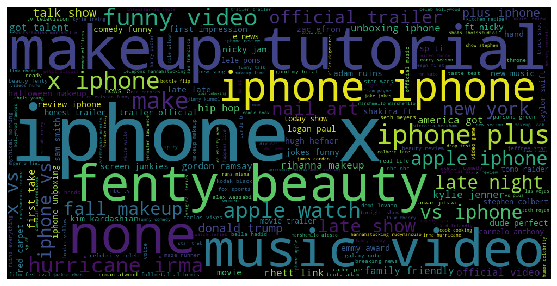

In [100]:
tags = videos['tags'].map(lambda k: k.lower().split('|')).values
k = (' '.join(videos['tags']))
wordcloud = WordCloud(width=1000,height=500).generate((' '.join(k.lower().split('|'))))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

--------iphone,makeup,tutorial,music,video,beauty,funny are some most common tags on these videos

In [101]:
videos.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date'],
      dtype='object')

In [102]:
df1 = pd.DataFrame(videos.channel_title.value_counts())
df1.columns=['times channel got trending']
df1.head().sort_index(0)

,times channel got trending
First We Feast,21
NFL,21
The Late Late Show with James Corden,21
The Tonight Show Starring Jimmy Fallon,21
Vox,21


First We Feast, NFL, The Late Late Show with James Corden, The Tonight Show Starring Jimmy Fallon and Vox are too five channel with got trending 21 times.

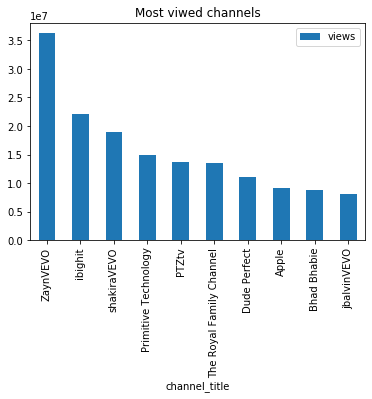

In [103]:
df_channel = pd.DataFrame(videos.groupby(by=['channel_title'])['views'].mean()).sort_values(by='views',
                                                                                        ascending=False)
df_channel.head(10).plot(kind='bar')
plt.title('Most viwed channels');

---------ZaynVEVO leads to be most viwed channel among all !

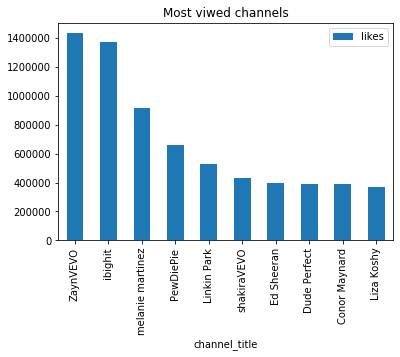

In [104]:
df_channel = pd.DataFrame(videos.groupby(by=['channel_title'])['likes'].mean()).sort_values(by='likes',
                                                                                        ascending=False)
df_channel.head(10).plot(kind='bar')
plt.title('Most viwed channels');

----------ZaynVEVO leads to be most liked channel among all !

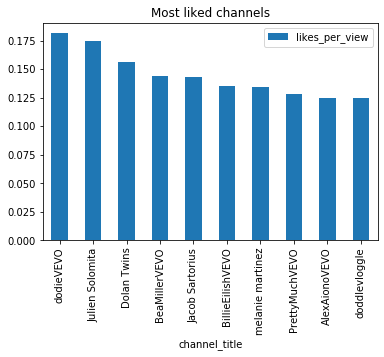

In [105]:
videos['likes_per_view'] = videos['likes']/videos['views']
df_channel = pd.DataFrame(videos.groupby(by=['channel_title'])['likes_per_view'].mean()).sort_values(by='likes_per_view',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most liked channels');

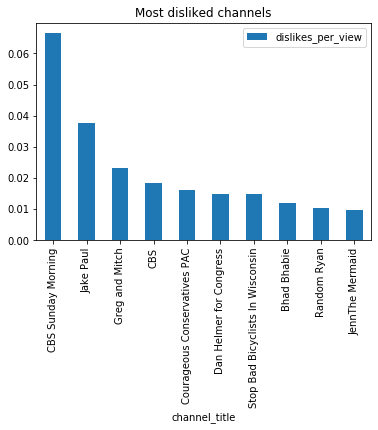

In [106]:
videos['dislikes_per_view'] = videos['dislikes']/videos['views']
df_channel = pd.DataFrame(videos.groupby(by=['channel_title'])['dislikes_per_view'].mean()).sort_values(by='dislikes_per_view',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most disliked channels');

-------CBS Sunday Morning is the most disliked channel

##### 4.1 Inferences

In [107]:
unique = pd.read_csv('unique.csv')

In [108]:
unique.sort_values(by = 'pos_comm',ascending = False).head()

,id,pos_comm,neg_comm,neutral_comm,total_comments
308,eERPlIdPJtI,426,32,142,600
549,Zmi9iQp6944,411,55,34,500
66,zKriLekFPwg,399,46,255,700
1229,p25S_5P6ejg,387,38,75,500
1124,fS5xHHqW-6E,380,25,195,600


In [109]:
videos[videos.video_id == 'eERPlIdPJtI'].title[225]

'Weight Update: 6 weeks Post Surgery! 93 pounds!'

Inference---- Mostly 'Weight Update: 6 weeks Post Surgery! 93 pounds!' have very large number of positive reviews


<Figure size 360x288 with 0 Axes>

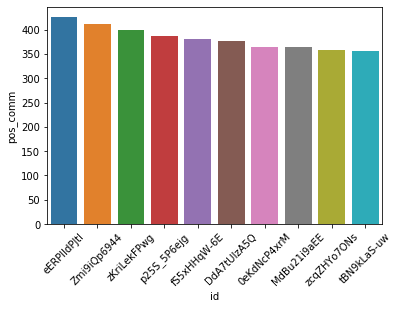

<Figure size 360x288 with 0 Axes>

In [110]:
sns.barplot(data=unique.sort_values(by='pos_comm',ascending=False).head(10),x ='id',y='pos_comm')
plt.xticks(rotation=45)
plt.figure(figsize=(5,4))

<Figure size 360x288 with 0 Axes>

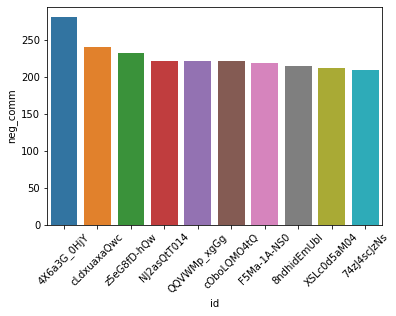

<Figure size 360x288 with 0 Axes>

In [111]:
sns.barplot(data=unique.sort_values(by='neg_comm',ascending=False).head(10),x ='id',y='neg_comm')
plt.xticks(rotation=45)
plt.figure(figsize=(5,4))

<Figure size 360x288 with 0 Axes>

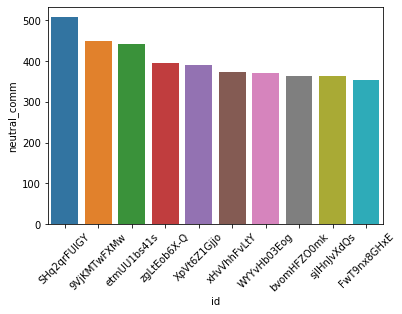

<Figure size 360x288 with 0 Axes>

In [112]:
sns.barplot(data=unique.sort_values(by='neutral_comm',ascending=False).head(10),x ='id',y='neutral_comm')
plt.xticks(rotation=45)
plt.figure(figsize=(5,4))

Number of likes have strong relationship with views

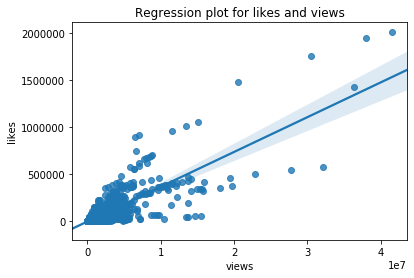

In [113]:
sns.regplot(data=videos,x='views',y='likes')
plt.title("Regression plot for likes and views");

Check relation between views and dislikes

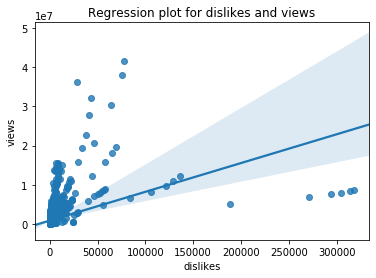

In [114]:
sns.regplot(data=videos,x='dislikes',y='views')
plt.title("Regression plot for dislikes and views");

### 5 Correlation matrix -Evidence of above anlaysis

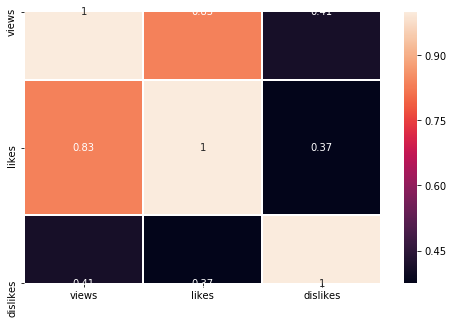

In [117]:
df_corr = videos[['views','likes','dislikes']]
plt.subplots(figsize=(8,5))  
sns.heatmap(df_corr.corr(),annot=True, linewidths=1)

With above Co-relation matrix we can see number of likes and views are totaly co related quantity having .83 relation